## グラフとNetworkX

### NetworkX入門

In [1]:
import networkx as nx

In [2]:
graph = nx.Graph()

In [3]:
graph.add_edge("A", "B")

graph.add_edges_from(
    [
        ("B", "C"),
        ("B", "D"),
        ("C", "D"),
        ("D", "E"),
        ("G", "F"),
        ("G", "H"),
    ]
)

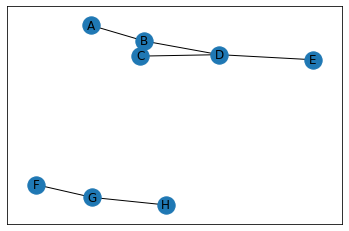

In [4]:
nx.draw_networkx(graph)

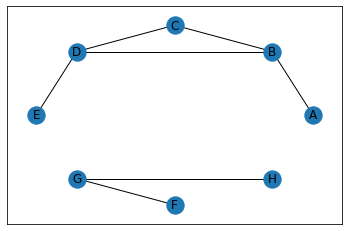

In [5]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))

### NetworkXを使ったグラフの解析

In [6]:
graph.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'G', 'F', 'H'))

In [7]:
graph.edges()

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('G', 'F'), ('G', 'H')])

In [8]:
graph["C"]

AtlasView({'B': {}, 'D': {}})

In [11]:
graph["A"]["B"]

{}

In [12]:
for s, t in graph.edges():
    graph[s][t]["value"] = 10

In [13]:
graph["A"]["B"]

{'value': 10}

In [14]:
graph.size()

7

In [15]:
graph.size(weight="value")

70.0

In [16]:
for node in graph.nodes():
    graph.nodes[node]["color"] = "gray"

In [17]:
graph.nodes["A"]

{'color': 'gray'}

In [18]:
nx.has_path(graph, "A", "E")

True

In [19]:
nx.has_path(graph, "A", "G")

False

In [21]:
for path in nx.all_shortest_paths(graph, source="A", target="E"):
    print(path)

['A', 'B', 'D', 'E']


In [22]:
nx.is_connected(graph)

False

In [23]:
cc_list = list(
    sorted(
        nx.connected_components(graph),
        key=lambda x: -len(x),
    )
)
cc_list[0]

{'A', 'B', 'C', 'D', 'E'}

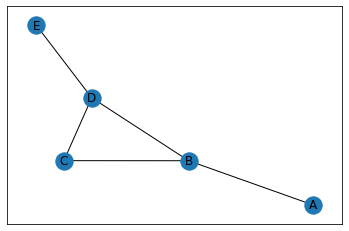

In [24]:
graph_0 = graph.subgraph(cc_list[0])

nx.draw_networkx(graph_0)

In [25]:
nx.is_connected(graph_0)

True

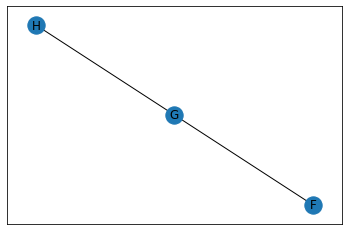

In [26]:
graph_1 = graph.subgraph(cc_list[1])
nx.draw_networkx(graph_1)

In [27]:
nx.is_tree(graph_1)

True

### pyvisを使ったグラフの描画

In [28]:
from pyvis.network import Network

# JupyterLabの環境で結果が埋め込まれるように引数を設定
net = Network(notebook=True, cdn_resources="in_line")
# NetworkXのGraphオブジェクトをpyvisのNetworkに変換
net.from_nx(graph)
# 描画とHTMLファイルの出力
net.show("pyvis_graph.html")

pyvis_graph.html


### グラフのためのファイル形式

In [29]:
# GML形式のファイルを出力
nx.write_gml(graph, "graph.gml")